# urllib 모듈
- 파이썬 모준 모듈
- url을 다루기 위한 모듈 패키지
- requests모듈과 마찬가지로 url과 관련된 여러가지 기능 제공
* https://docs.python.org/3/library/urllib.html
- urllib 모듈 4가지
    - request : url을 열고 읽는 모듈(http 요청)
    - parse : url을 파싱하는 모듈(url 해석 및 조작)
    - error : request 모듈에서 발생하는 에러들을 포함하는 모듈
    - robotparser : robots.txt파일을 파싱하는 모듈

In [1]:
import urllib

## urllib.request
- 해당 url을 요청 객체생성, httprequest객체 반환
- 여러가지 함수들을 제공, 전체url, 프로토콜타입, 호스트 등

In [2]:
url='https://www.naver.com'
request=urllib.request.Request(url)

In [3]:
request

## urllib.urlopen
- 해당 url을 열기, 응답데이터는 바이트 형식의 HTTPResponse 객체
- request객체 또는 URL을 직접 넣어도된다.

In [4]:
response1=urllib.request.urlopen(request)

In [5]:
response1

In [6]:
response2=urllib.request.urlopen(url)

In [7]:
response2

In [8]:
print(response1.geturl)

<bound method HTTPResponse.geturl of <http.client.HTTPResponse object at 0x00000000050F08C8>>


In [9]:
print(response1.getheaders())

[('Server', 'NWS'), ('Date', 'Thu, 11 Jun 2020 05:36:43 GMT'), ('Content-Type', 'text/html; charset=UTF-8'), ('Transfer-Encoding', 'chunked'), ('Connection', 'close'), ('Set-Cookie', 'PM_CK_loc=84fdb444fdefec1ad389b7bb446926d27c7246c412d47315305371c81233f263; Expires=Fri, 12 Jun 2020 05:36:43 GMT; Path=/; HttpOnly'), ('Cache-Control', 'no-cache, no-store, must-revalidate'), ('Pragma', 'no-cache'), ('P3P', 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"'), ('X-Frame-Options', 'DENY'), ('X-XSS-Protection', '1; mode=block'), ('Strict-Transport-Security', 'max-age=63072000; includeSubdomains'), ('Referrer-Policy', 'unsafe-url')]


## read()
- urlopen으로 연 객체를 일고, 인자로 전달하는 숫자만큼 데이터를 읽음
    - 바이트 형식으로 읽는다.
- readline() : 홈페이지 데이터를 줄 단위로 읽어 리스트로반환

In [10]:
response1.read(100)

b'\n<!doctype html>                     <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"'

'> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <link rel="stylesheet" href="https://pm.pstatic.net/dist/css/nmain.202006
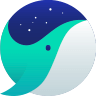
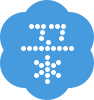

In [11]:
response1.read().decode()

## decode
* 바이트 형식의 데이터를 원하는 형식으로 변환
* 기본값으로 utf-8 

# parse()
- url을 파싱하여 분석하기 위한 모듈
    - http뿐만 아니라, ftp, ssh, imap등도 포함
- url의 값은 인터넷 공간에 존재하는 데이터들을 가르키는 절대주소

## urlparse()
- url을 6개로 분리하여 반환한다  
    scheme, netloc, path, params, query, fragment

In [15]:
URL = "https://blog.naver.com/koreatech91;a=1?b=2#b"
parse = urllib.parse.urlparse(URL)
print(parse)

ParseResult(scheme='https', netloc='blog.naver.com', path='/koreatech91', params='a=1', query='b=2', fragment='b')


## urlsplit()
* url을 5개로 분리하여 반환한다  
    scheme, netloc, path, query, fragment

In [16]:
URL = "https://blog.naver.com/koreatech91;a=1?b=2#b"
parse = urllib.parse.urlsplit(URL)
print(parse)

SplitResult(scheme='https', netloc='blog.naver.com', path='/koreatech91;a=1', query='b=2', fragment='b')


In [18]:
parse=list(parse)

In [19]:
parse[1]='blog.daum.net'

In [20]:
parse[1]

'blog.daum.net'

## urlunparse(), urlunsplit()
- 분리된 url을 다시 합침
- 분리될때 튜플로 반환이 되기 때문에 리스트로 변환한 후에 값을 고치고 합치면 된다

In [21]:
unparse=urllib.parse.urlunsplit(parse)

In [22]:
unparse

'https://blog.daum.net/koreatech91;a=1?b=2#b'

## parse_qs(),parse_qsl()
- 쿼리를 파싱해서 사전(qs) 및 리스트(qsl)로 반환
- 쿼리를 변경하여 요청할 때 사용

In [23]:
url='https://www.naver.com?a=1&b=2&c=3&d=4'
parse=urllib.parse.urlparse(url)
print(parse.query)

a=1&b=2&c=3&d=4


In [24]:
qs=urllib.parse.parse_qs(parse.query)
print(qs)

{'a': ['1'], 'b': ['2'], 'c': ['3'], 'd': ['4']}


In [25]:
qsl=urllib.parse.parse_qsl(parse.query)
print(qsl)

[('a', '1'), ('b', '2'), ('c', '3'), ('d', '4')]


## urljoin(a,b)
- a와 b url을 합쳐주는 기능
- '/'에 따라 URL 주소가 달라지는 것에 주의

In [26]:
url = "http://naver.com/a/b"

url2 = urllib.parse.urljoin(url, 'c')
print(url2)
url3 = urllib.parse.urljoin(url, '/c')
print(url3)

http://naver.com/a/c
http://naver.com/c


In [27]:
url = "http://naver.com/a/b/"
url2 = urllib.parse.urljoin(url, 'c')
print(url2)
url3 = urllib.parse.urljoin(url, '/c')
print(url3)

http://naver.com/a/b/c
http://naver.com/c


## quote(),unquote()
- 아스키 코드가 아닌 문자들을 퍼센트 인코딩으로 변환
- url에 한글이 섞이면 오류가 발생한다. 이 때, 퍼센트 인코딩으로 변환시킨 값을 넣어주면 해결된다.
- unique()는 quote()의 반대이다.

In [28]:
url='http://search.naver.com/search.naver?query=파이썬'

In [29]:
resp=urllib.request.urlopen(url)
byte_data=resp.read()
text_data=byte_data.decode()
print(text_data)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 24-26: ordinal not in range(128)

In [30]:
print(urllib.parse.quote('파이썬'))

%ED%8C%8C%EC%9D%B4%EC%8D%AC


In [31]:
url='http://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'
resp=urllib.request.urlopen(url)
byte_data=resp.read()
text_data=byte_data.decode()
print(text_data)

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="파이썬 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'파이썬'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'파이썬'의 네이버 통합검색 결과입니다."> <title>파이썬 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200528.css"> <link rel="stylesheet" type="text/css" href="htt

##

In [37]:
url='https://www.naver.com'
req=urllib.request.Request(url)
resp=urllib.request.urlopen(req)
data=resp.read()

f= open('pc.html','wb')
f.write(data)
f.close

<function BufferedWriter.close>

In [38]:
url='https://www.naver.com'
header={'Uesr-Agent':'Mozilla/5.0 (iPhone)'}
req=urllib.request.Request(url,headers=header)
resp=urllib.request.urlopen(req)
data=resp.read()

f= open('mobile.html','wb')
f.write(data)
f.close

<function BufferedWriter.close>